In [1]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [6]:
zoo.catsize.unique()

array([1, 0], dtype=int64)

# Visualizations 

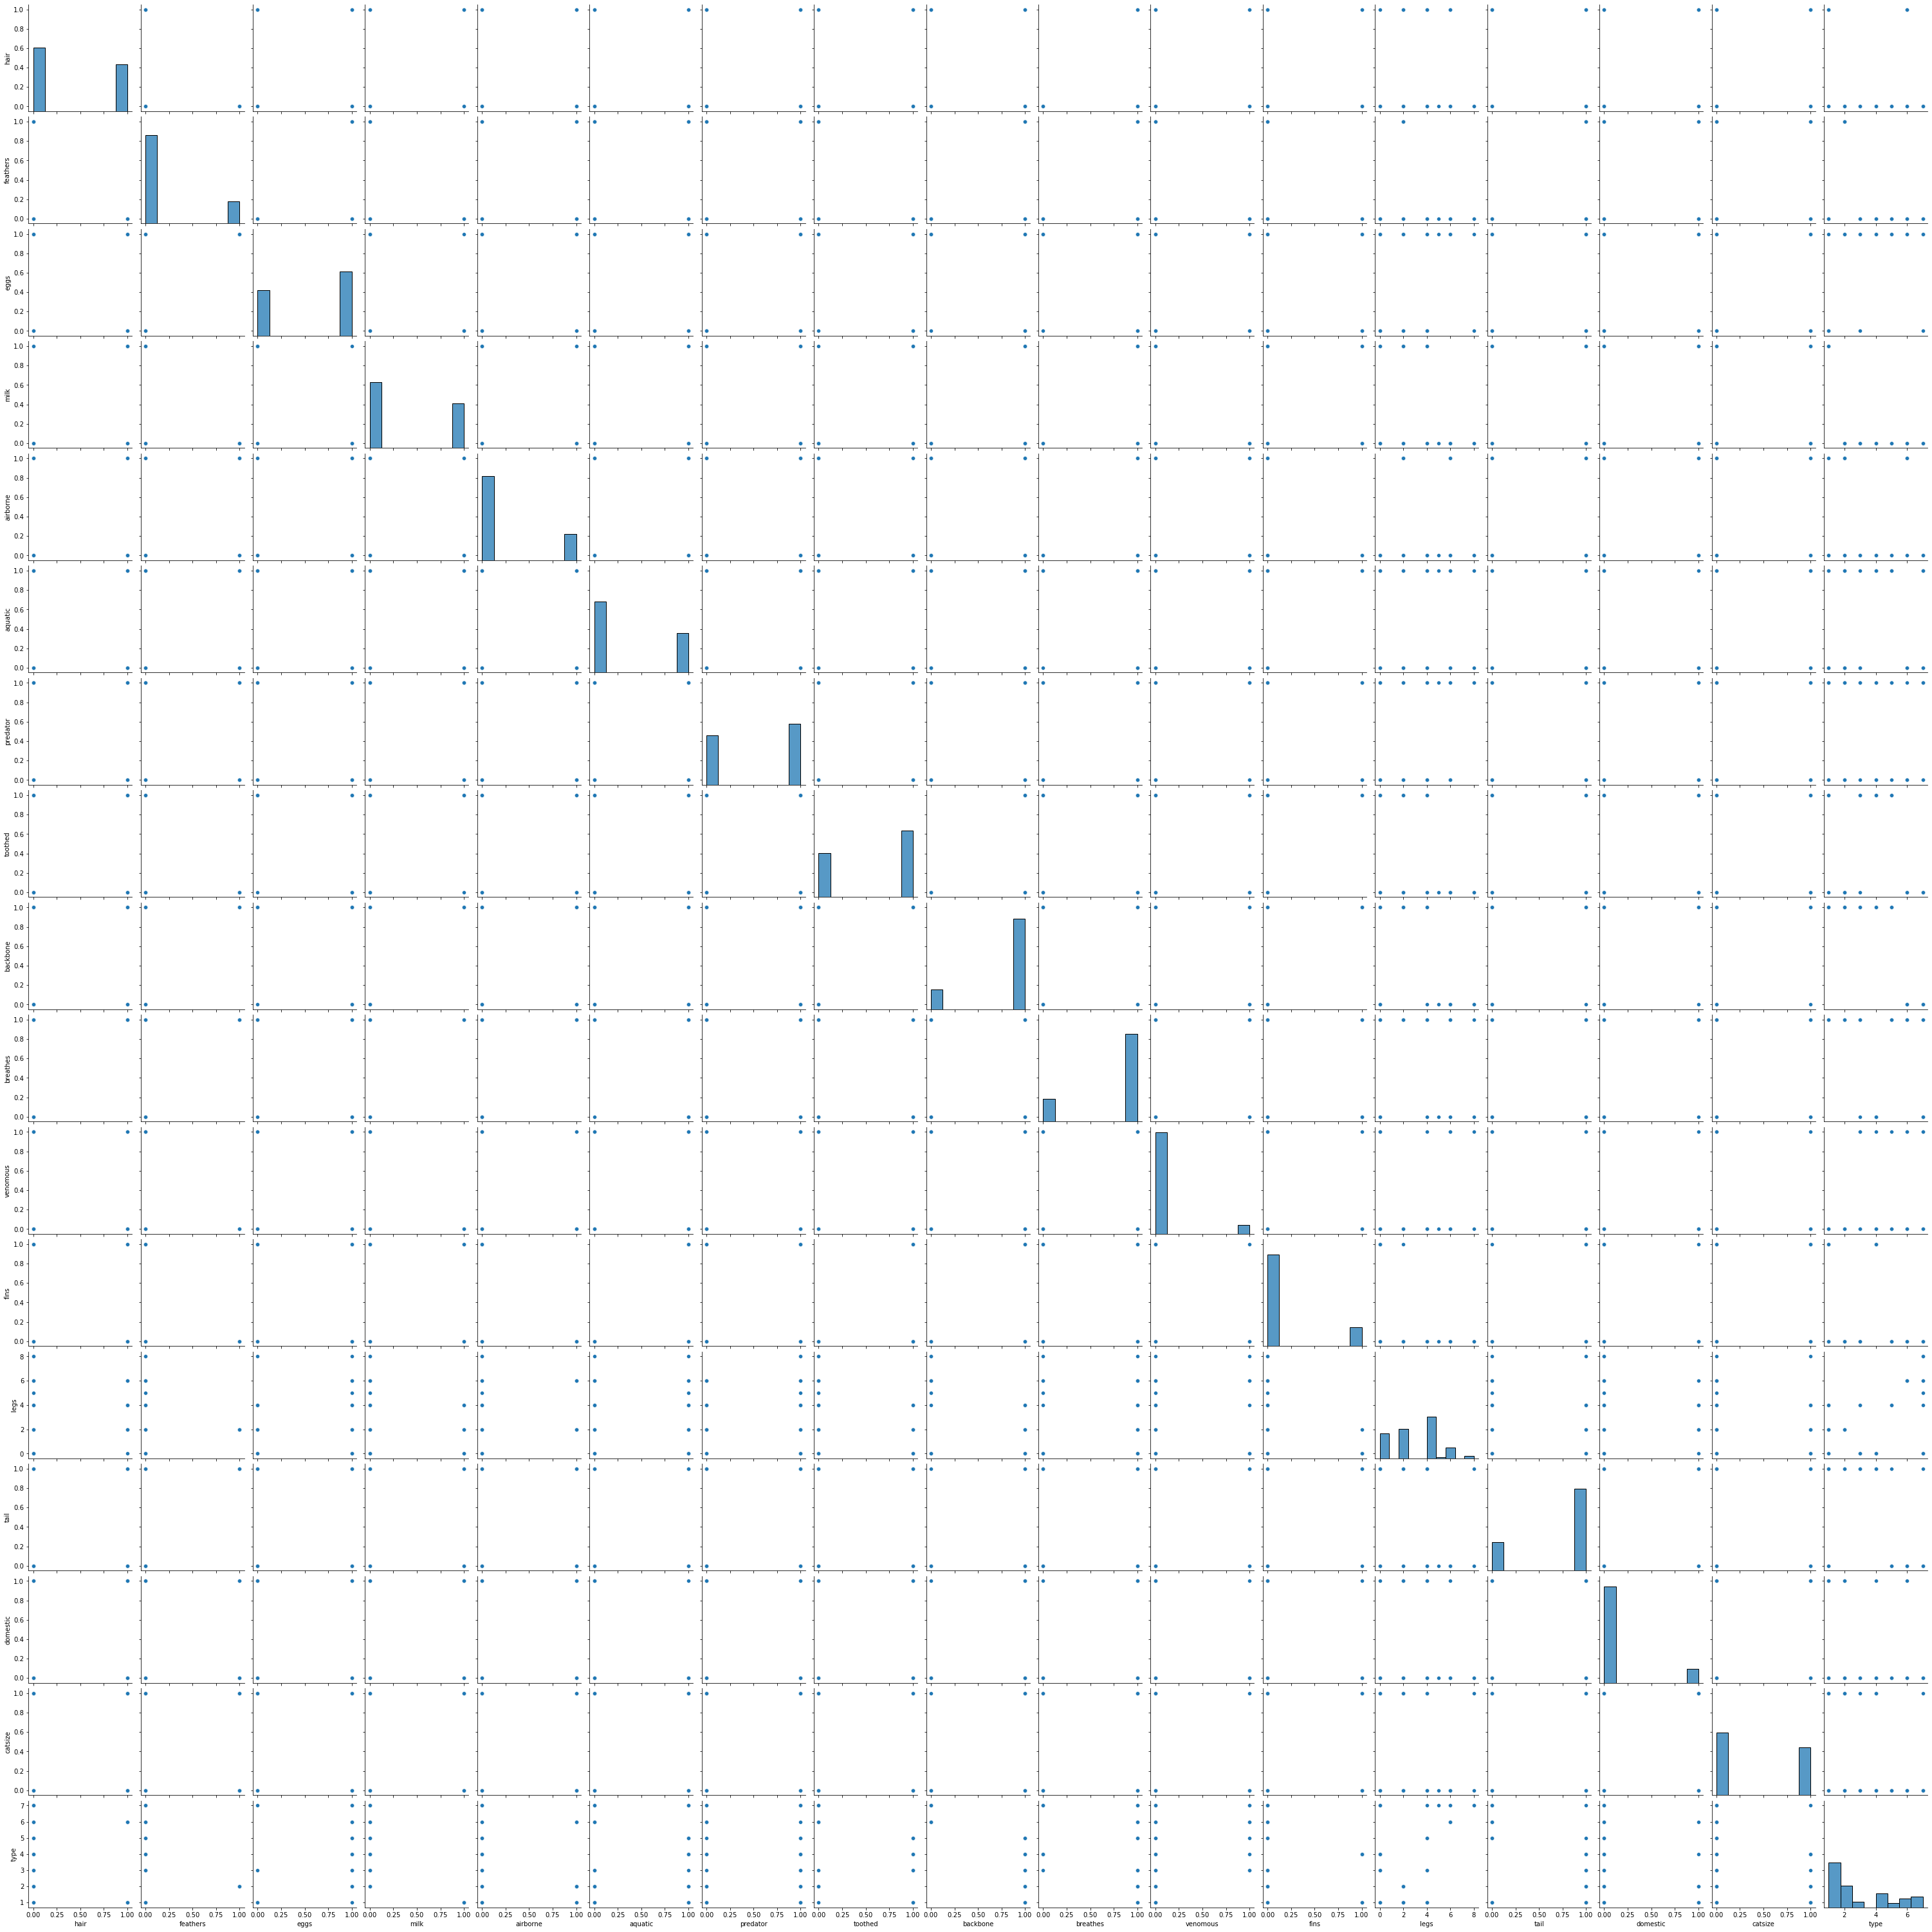

In [7]:
sns.pairplot(zoo)

C:\AN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='legs', ylabel='catsize'>

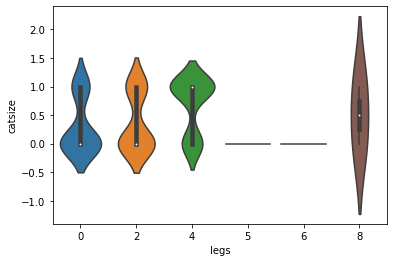

In [8]:
sns.violinplot(zoo['legs'],zoo['catsize'])

C:\AN\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='legs', ylabel='catsize'>

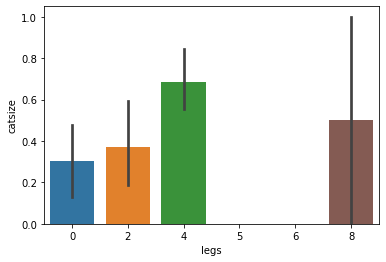

In [9]:
sns.barplot(zoo['legs'],zoo['catsize'])

C:\AN\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

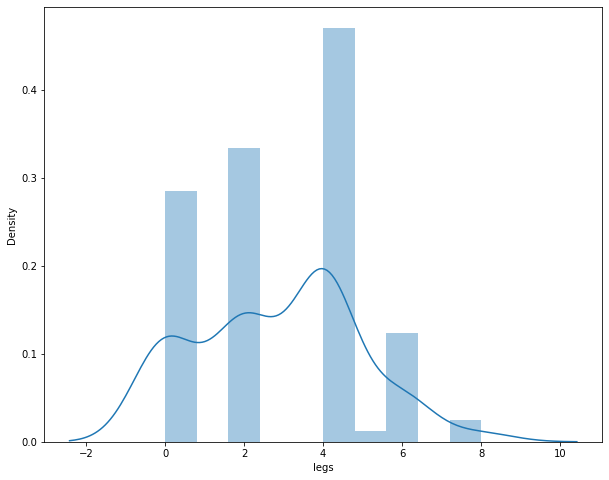

In [10]:
plt.figure(figsize=(10,8))
sns.distplot(zoo['legs'])
plt.show

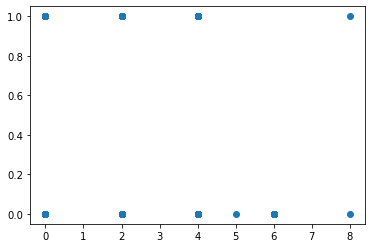

In [11]:
plt.scatter(zoo['legs'],zoo['catsize'])

In [12]:
X =zoo.drop(['animal name','catsize'],axis=1)
Y =zoo.iloc[:,16] # -1 means last column

In [14]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7


In [15]:
Y

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

In [16]:
model1 = KNeighborsClassifier(n_neighbors = 12)

In [17]:
model1.fit(X,Y)

KNeighborsClassifier(n_neighbors=12)

In [18]:
kfold = KFold(n_splits=10)
results1 = cross_val_score(model1, X, Y, cv = kfold)

In [19]:
results1

array([0.90909091, 0.8       , 0.8       , 0.8       , 0.9       ,
       0.5       , 1.        , 0.8       , 0.6       , 0.6       ])

In [22]:
results1.mean()

0.7709090909090909

In [23]:
model1.predict([[1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1]])

C:\AN\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [24]:
model1.predict([[0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,4]])

C:\AN\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Grid Search For Algorithm Tuning 

In [25]:
n_neighbors = list(range(1,21))
parameters = {'n_neighbors' : n_neighbors}

In [26]:
model2 = KNeighborsClassifier()
grid = GridSearchCV(estimator = model2, param_grid = parameters)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.7919047619047619
{'n_neighbors': 3}


# Visualizing the CV results 

In [28]:
k_range = range(1, 21)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())

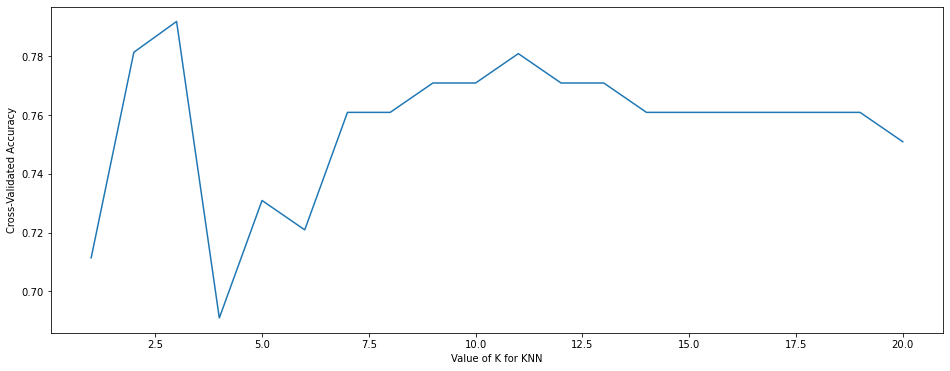

In [29]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
k_scores

[0.7114285714285714,
 0.7814285714285714,
 0.7919047619047619,
 0.6909523809523809,
 0.730952380952381,
 0.7209523809523809,
 0.760952380952381,
 0.7609523809523809,
 0.7709523809523808,
 0.7709523809523808,
 0.7809523809523811,
 0.7709523809523808,
 0.7709523809523808,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7609523809523809,
 0.7509523809523809]

In [31]:
df_accuracy = pd.DataFrame({'Value of k' : range(1,21),
                            'Accuracy' : k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.711429
1,2,0.781429
2,3,0.791905
3,4,0.690952
4,5,0.730952
5,6,0.720952
6,7,0.760952
7,8,0.760952
8,9,0.770952
9,10,0.770952


In [32]:
df_accuracy.sort_values('Accuracy', ascending = False)

,Value of k,Accuracy
2,3,0.791905
1,2,0.781429
10,11,0.780952
8,9,0.770952
9,10,0.770952
11,12,0.770952
12,13,0.770952
6,7,0.760952
15,16,0.760952
18,19,0.760952
